In [ ]:
import pandas as pd
import tensorflow as tf

## 데이터 불러오기

In [ ]:
dataset_path = tf.keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 2us/step


'/root/.keras/datasets/auto-mpg.data'

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

In [ ]:
raw_dataset = pd.read_csv(
    dataset_path, names=column_names, na_values='?', comment='\t', 
    sep=' ', skipinitialspace=True
)

In [ ]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
dataset = raw_dataset.copy()

## 데이터 전처리 (정제)

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
origin = dataset.pop('Origin')

In [ ]:
dataset['USA'] = (origin==1) * 1.0
dataset['Europe'] = (origin==2) * 1.0
dataset['Japan'] = (origin==3) * 1.0

In [ ]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


## 데이터셋 분리

In [ ]:
train_dataset = dataset.sample(frac=0.8)
test_datset = dataset.drop(train_dataset.index)

In [ ]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.442994,5.493631,195.320064,104.662420,2976.324841,15.463376,76.098726,0.633758,0.165605,0.200637
std,7.774767,1.696159,103.047712,38.012871,831.250059,2.644102,3.665720,0.482546,0.372319,0.401116
min,9.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,76.000000,2220.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,22.450000,4.000000,151.000000,95.000000,2850.000000,15.450000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,265.750000,125.000000,3612.000000,17.000000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,22.200000,82.000000,1.000000,1.000000,1.000000


In [ ]:
# !pip install seaborn

In [ ]:
import seaborn as sns

In [ ]:
# sns.pairplot(train_dataset)

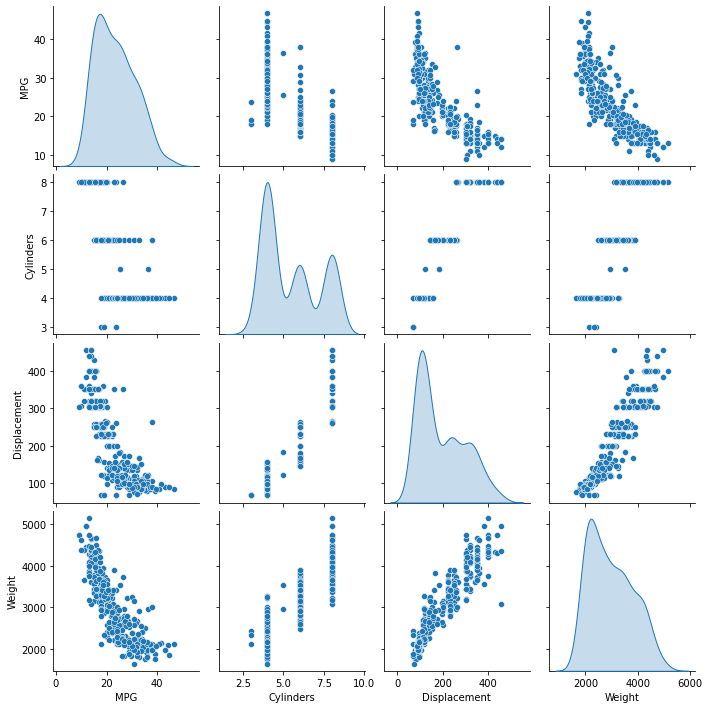

In [ ]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [ ]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [ ]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [ ]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
normed_train_data.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02
mean,1.538048e-16,1.264028e-16,-4.561107e-17,-1.923444e-16,1.414297e-17,6.816911e-16,2.262875e-17,-3.641814e-17,-2.121445e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.470163e+00,-1.235545e+00,-1.543225e+00,-1.596782e+00,-2.822651e+00,-1.663718e+00,-1.313364e+00,-4.447934e-01,-5.001966e-01
25%,-8.805957e-01,-8.764878e-01,-7.540188e-01,-9.089621e-01,-6.196342e-01,-8.453253e-01,-1.313364e+00,-4.447934e-01,-5.001966e-01
50%,-8.805957e-01,-4.300927e-01,-2.541881e-01,-1.519697e-01,-5.058730e-03,-2.693225e-02,7.589789e-01,-4.447934e-01,-5.001966e-01
75%,1.477673e+00,6.834692e-01,5.350183e-01,7.647219e-01,5.811517e-01,7.914608e-01,7.589789e-01,-4.447934e-01,-5.001966e-01
max,1.477673e+00,2.519997e+00,3.297241e+00,2.602917e+00,2.547793e+00,1.609854e+00,7.589789e-01,2.241075e+00,1.992847e+00


## 모델 학습

In [ ]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1) 
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x=normed_train_data, y=train_labels, epochs=100, validation_split=0.2, verbose=0)

In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

In [ ]:
import matplotlib.pyplot as plt

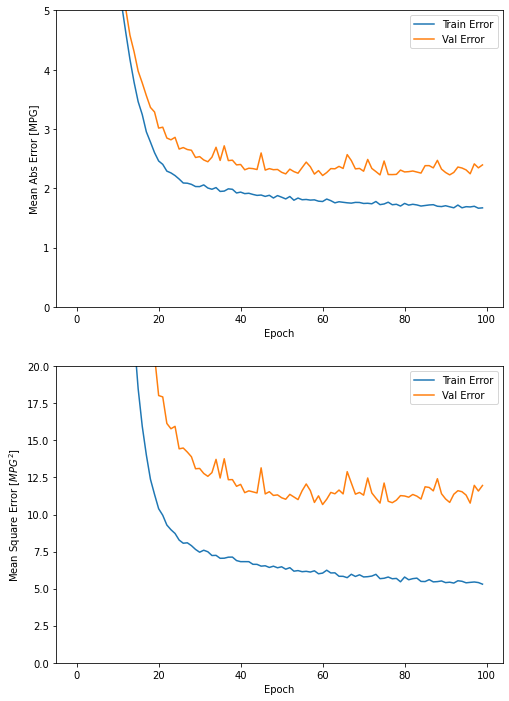

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

## 결과 분석

In [ ]:
test_predictions = model.predict(normed_test_data)

In [ ]:
normed_test_data.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,-0.026479,-0.044225,-0.047443,-0.059832,0.002214,0.057005,-0.011507,-0.031583,0.043159
std,1.026220,1.033451,1.058990,1.052512,1.001965,1.015311,1.008012,0.975337,1.035921
min,-1.470163,-1.216136,-1.490611,-1.640090,-2.633551,-1.663718,-1.313364,-0.444793,-0.500197
25%,-0.880596,-0.944418,-0.800056,-0.982646,-0.666909,-0.845325,-1.313364,-0.444793,-0.500197
50%,-0.880596,-0.556248,-0.385723,-0.341443,-0.080699,-0.026932,0.758979,-0.444793,-0.500197
75%,1.477673,0.938206,0.449521,0.878406,0.581152,0.996059,0.758979,-0.444793,-0.500197
max,1.477673,1.986264,3.297241,2.128932,2.547793,1.609854,0.758979,2.241075,1.992847


In [ ]:
test_predictions.shape

(78, 1)

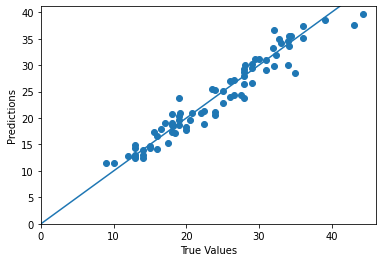

In [ ]:
plt.scatter(test_labels, test_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])